# 畫平均線與標準差曲線圖

由於運動生物力學分析經常需要繪製平均線與標準差曲線圖，因此本篇參考[這篇CSND](https://blog.csdn.net/a1920993165/article/details/122277716)繪製，首先是輸入使用的package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

## 定義繪圖格式與字體
編輯繪圖文字與字體，讓圖片好看一點

In [4]:
# 設定繪圖格式與字體
plt.style.use('seaborn-white')
# 顯示輸入中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
# 設定顏色格式
# 參考 Qualitative: https://matplotlib.org/stable/tutorials/colors/colormaps.html
palette = pyplot.get_cmap('Set1')
# 設定文字格式
front1 = {'family': 'Times News Roman',
          'weight': 'normal',
          'size': 18
    }
# 設定圖片文字格式
parameters = {'axes.labelsize': 24, # x 和 y 標籤的字型大小
          'axes.titlesize': 28, # 設定軸標題的字型大小
          'xtick.labelsize': 18, # 設定x軸刻度標籤的字型大小
          'ytick.labelsize': 18} # 設定y軸刻度標籤的字型大小
plt.rcParams.update(parameters)

## 輸入資料

In [5]:
# 讀資料
data = pd.read_excel(r"D:\NTSU\TenLab\LinData\angle-100_.xlsx",
                     skiprows=1) # 跳過列數
data1 = data.iloc[:, 1:7] #設定資料欄位
data2 = data.iloc[:, 11:17] #設定資料欄位
data1 = data1.dropna(axis=0) #丟棄NAN的值
data2 = data2.dropna(axis=0) #丟棄NAN的值
iters = list(range(len(data1))) #設定資料的x軸

## 設定圖片參數

(0.0, 100.0)

findfont: Font family ['Times News Roman'] not found. Falling back to DejaVu Sans.


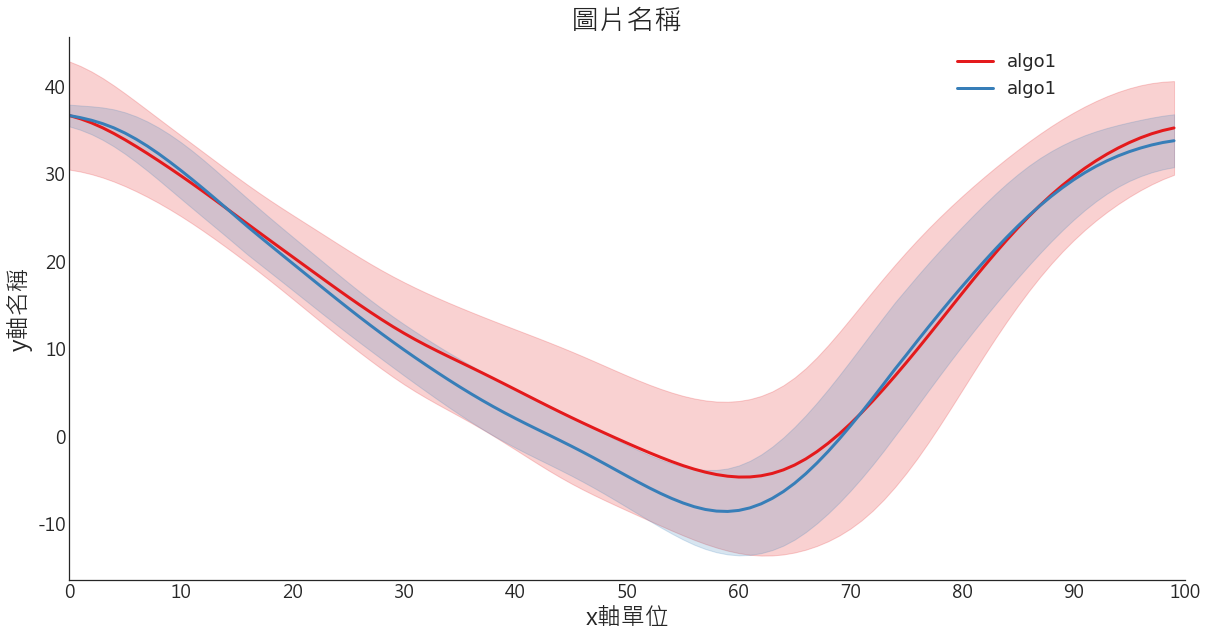

In [6]:
# 設定圖片大小
fig, ax = plt.subplots(figsize=(20, 10))
# 畫第一條線
color = palette(0) # 設定顏色
avg1 = np.mean(data1, axis=1) # 計算平均
std1 = np.std(data1, axis=1) # 計算標準差
r1 = list(map(lambda x: x[0]-x[1], zip(avg1, std1))) # 畫一個標準差以內的線
r2 = list(map(lambda x: x[0]+x[1], zip(avg1, std1)))
plt.plot(iters, avg1, color=color, label='algo1', linewidth=3)
plt.fill_between(iters, r1, r2, color=color, alpha=0.2)

# 畫第二條線
color = palette(1) # 設定顏色
avg2 = np.mean(data2, axis=1) # 計畫平均
std2 = np.std(data2, axis=1) # 計算標準差
r1 = list(map(lambda x: x[0]-x[1], zip(avg2, std2))) # 畫一個標準差以內的線
r2 = list(map(lambda x: x[0]+x[1], zip(avg2, std2)))
plt.plot(iters, avg2, color=color, label='algo1', linewidth=3) # 畫平均線
plt.fill_between(iters, r1, r2, color=color, alpha=0.2) # 塗滿一個正負標準差以內的區塊

# 圖片的格式設定
x_major_locator = MultipleLocator(10) # 設置x軸刻度為10的倍數
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.spines['right'].set_visible(False) #去掉右邊框
ax.spines['top'].set_visible(False) # 去掉上邊框
plt.title('圖片名稱', fontsize=28) # 設定圖片名稱與大小
plt.legend(loc='upper right', bbox_to_anchor = (0.9, 1), prop=front1) # 圖例位置
ax.set_xlabel('x軸單位') # x軸名稱
ax.set_ylabel('y軸名稱') # y軸名稱
plt.xlim(0,100) # x軸刻度